## Assignment 1 on ML 1 ...... ITI

### **Predictions of Houses Prices in (Hyderabad) in india**

In [1]:
# Data set from kaggle in the link below 
from IPython.core.display import display, HTML
display(HTML("""<a href="https://www.kaggle.com/ruchi798/housing-prices-in-metropolitan-areas-of-india">click_here</a>"""))

### > Important Notes :
####  `1. this NoteBook is explainig every step by comments and Markdowns in each cell` 
####  `2. please do not jump below , read this Notebook cell by cell to understand what i am doing ` 
####  `3.  read my comments carefully,i am using some tricks (every thing is explained with comments)` 
####  `3. finally after reading all Notebook , you will be satisfied isa`

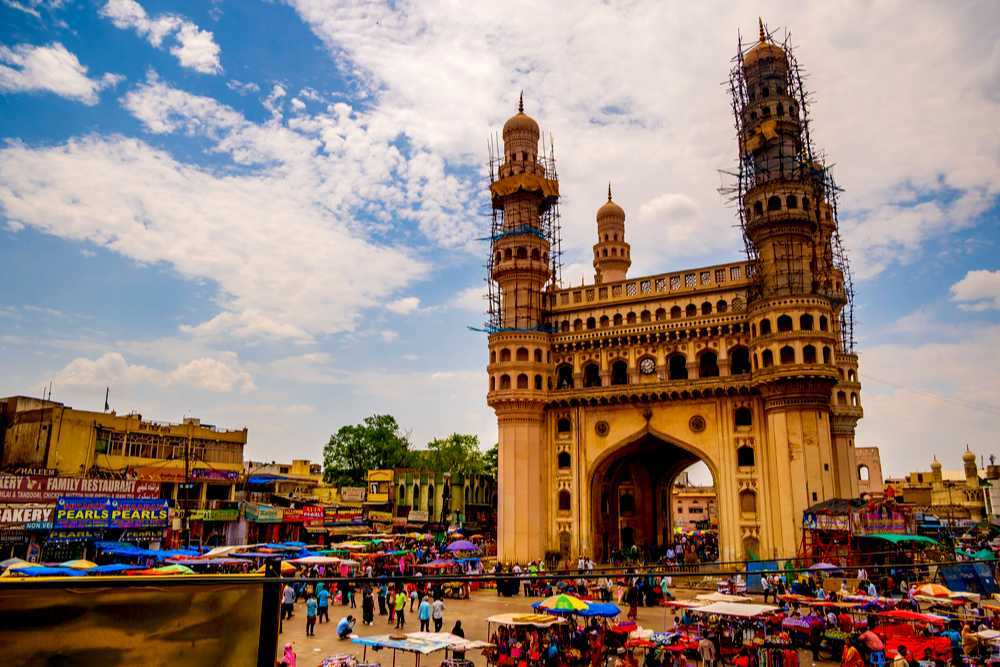

---------

In [2]:
! pip install geopy

In [3]:
## Most Important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## less Important
from scipy.stats import spearmanr
import missingno as msno
import joblib
import os
import tarfile
import urllib
from geopy.geocoders import Nominatim   ## for getting Longitude and Latitude using Location

## Sklearn & others
from sklearn import datasets
import xgboost as xgb

## Metrics
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import accuracy_score, r2_score

## Preprocessing & Imputing & Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import LocallyLinearEmbedding

## Validating and Tuning
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

## Algorithm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

### Read the Data and Look at the big Picture

In [4]:
housing = pd.read_csv('Hyderabad.csv')
housing.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
### look at the nulls and data types
housing.info()

## ! there is no null , but check the description of Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                2518 non-null   int64 
 1   Area                 2518 non-null   int64 
 2   Location             2518 non-null   object
 3   No. of Bedrooms      2518 non-null   int64 
 4   Resale               2518 non-null   int64 
 5   MaintenanceStaff     2518 non-null   int64 
 6   Gymnasium            2518 non-null   int64 
 7   SwimmingPool         2518 non-null   int64 
 8   LandscapedGardens    2518 non-null   int64 
 9   JoggingTrack         2518 non-null   int64 
 10  RainWaterHarvesting  2518 non-null   int64 
 11  IndoorGames          2518 non-null   int64 
 12  ShoppingMall         2518 non-null   int64 
 13  Intercom             2518 non-null   int64 
 14  SportsFacility       2518 non-null   int64 
 15  ATM                  2518 non-null   int64 
 16  ClubHo

### Data Cleaning

In [6]:
### description 
### '9' was used to mark such values, 
## which could indicate the absence of information about the apartment 
## but these values don't ascertain the absence of such a feature in real life

housing_df = housing.copy()

### replce 9 with Nan then drop it
housing_df.replace(9, np.nan, inplace=True)

## check
housing_df.isnull().sum()

Price                   0
Area                    0
Location                0
No. of Bedrooms         0
Resale                  0
MaintenanceStaff       84
Gymnasium              84
SwimmingPool           84
LandscapedGardens      84
JoggingTrack           84
RainWaterHarvesting    84
IndoorGames            84
ShoppingMall           84
Intercom               84
SportsFacility         84
ATM                    84
ClubHouse              84
School                 84
24X7Security           84
PowerBackup            84
CarParking             84
StaffQuarter           84
Cafeteria              84
MultipurposeRoom       84
Hospital               84
WashingMachine         84
Gasconnection          84
AC                     84
Wifi                   84
Children'splayarea     84
LiftAvailable          84
BED                    84
VaastuCompliant        84
Microwave              84
GolfCourse             84
TV                     84
DiningTable            84
Sofa                   84
Wardrobe    

In [7]:
### drop Nans
housing_df.dropna(axis=0, inplace=True)

## check
housing_df.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


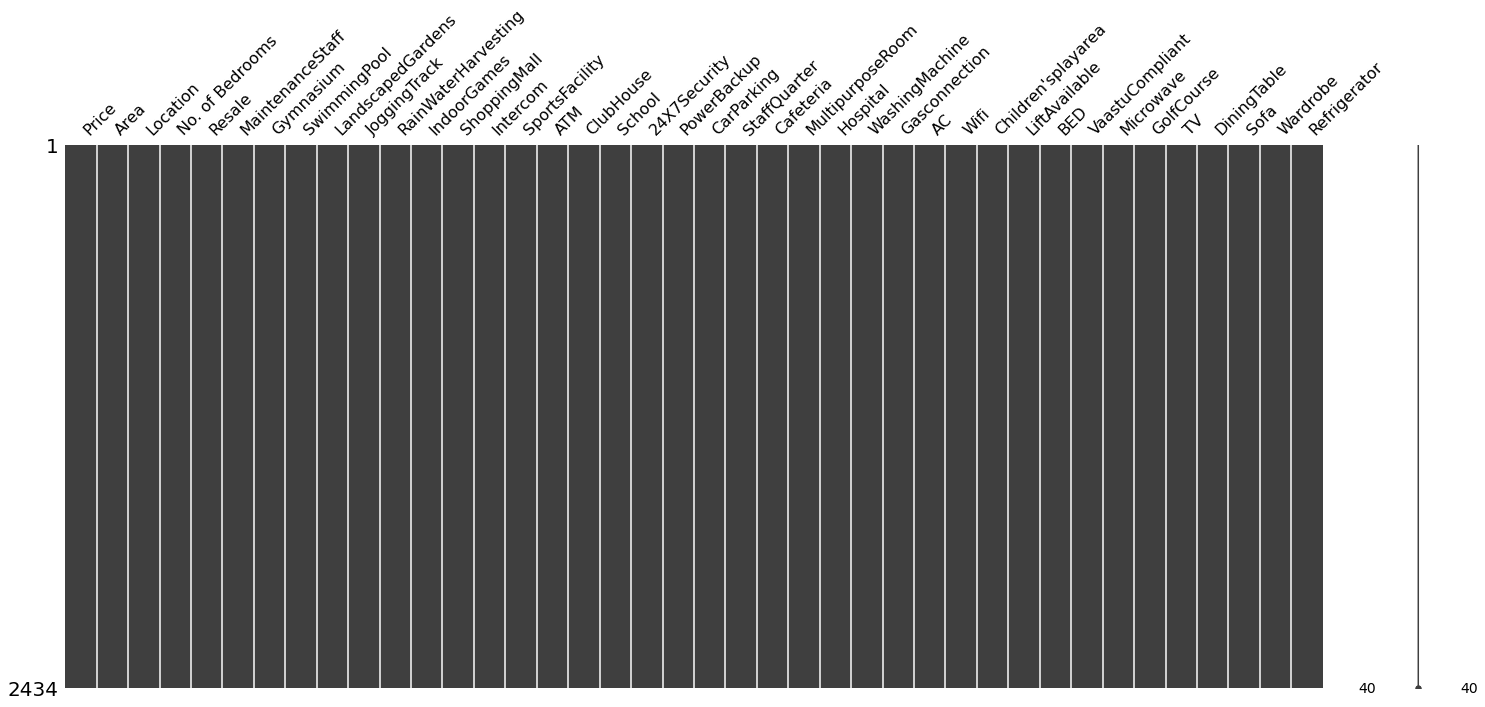

In [8]:
msno.matrix(housing_df);   ### no nulls >.. good work

### Split the Data but with stratifid method 

1150    75
1100    73
1200    67
1050    64
1515    50
        ..
1924     1
1912     1
3959     1
1896     1
1960     1
Name: Area, Length: 570, dtype: int64

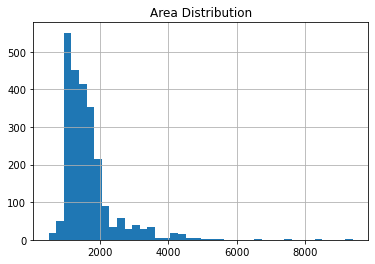

In [9]:
housing_df['Area'].hist(bins=40, figsize=(6, 4))
plt.title('Area Distribution');
housing_df['Area'].value_counts()

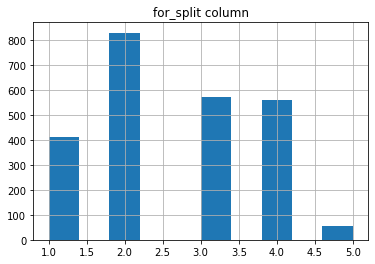

In [10]:
### try to make this column category to split it into train and test (most important is AREA)
## and the splitted data willl be representative in both

housing_df['for_split'] = pd.cut(housing['Area'], 
                              bins=[0, 1100, 1500, 1800, 4000, np.inf],
                              labels=[1, 2, 3, 4, 5])
plt.title('for_split column')
housing_df['for_split'].hist();

In [11]:
### split the data using that column using stratifiedMethod
split_data = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
gen_for_indices = split_data.split(housing_df, housing_df['for_split'])

for train_idx, test_idx in gen_for_indices:
    train_set = housing_df.iloc[train_idx]
    test_set = housing_df.iloc[test_idx]

print('housing_df shape =>', housing_df.shape)
print('=='*15)
print('train_set shape =>', train_set.shape) # 80 %
print('=='*15)
print('test_set shape =>', test_set.shape) # 20 %

#### Finally drop that column (for_split)
#### now we drop this column (we already split)
train_set = train_set.drop(columns=['for_split'], axis=1)
test_set = test_set.drop(columns=['for_split'], axis=1)

housing_df shape => (2434, 41)
train_set shape => (1947, 41)
test_set shape => (487, 41)


### Feature Engineering and EDA

##### Extract Longitude and Latitude from Location >>> AMAZING TRICK BY AGOOR
https://stackoverflow.com/questions/13686001/python-module-for-getting-latitude-and-longitude-from-the-name-of-a-us-city

In [13]:
latitude = []
longitude = []

### Read this please for no confusion
### Read this please for no confusion
### Read this please for no confusion
### Read this please for no confusion
### Read this please for no confusion
### Read this please for no confusion


##### this code was run before but it take too much time to run
#### so i run it for one time , download the results of(latitude and Longitude) to mycomputer
### and then i will read them using pandas
#### note that both latitude and longitude are both extracted from code below 

## i will put it in a function instead of putting it in comments
def dummy_func():
    for i in range(len(train_set)):
        print(i)
        geolocator = Nominatim(user_agent='myapplication')
        total_data = geolocator.geocode(train_set['Location'].values[i])
        if total_data:
            latitude.append(total_data.latitude)
            longitude.append(total_data.longitude)
        else:
            latitude.append(0)
            longitude.append(0)
            
    latitude_train = pd.DataFrame({'latitude':latitude})
    longitude_train = pd.DataFrame({'longitude':longitude})
    latitude_train.to_csv('latitude_train.csv')
    longitude_train.to_csv('longitude_train.csv')
    
    print('Done perfectly :D')

### i call this functio for one time only , you do not need to call it again, it is just one time
# dummy_func()

# comments:
## Here i will convert both lists to DataFrame
## then i will download them then read them as csv
## beacuse that i mentioned before the above code take a long long time to be run
## as it extract the longitude and latitude from each location

In [11]:
## Read them again by pandas to be able to work on them and not run the main code
df_latitude_train = pd.read_csv('latitude_train.csv')
df_longitude_train = pd.read_csv('longitude_train.csv')

## conctentate both of them
df_long_lat = pd.concat([df_latitude_train, df_longitude_train], axis=1)
df_long_lat.drop(columns=['Unnamed: 0'], axis=1, inplace=True)


### by checking , some cities can not be extracted so in the main code i make them = 0
## i will impute them using the median not dropping them
## in the pipeling 
df_long_lat[(df_long_lat['latitude']==0) | (df_long_lat['longitude']==0)]

,latitude,longitude
20,0.0,0.0
27,0.0,0.0
39,0.0,0.0
49,0.0,0.0
71,0.0,0.0
...,...,...
1867,0.0,0.0
1903,0.0,0.0
1905,0.0,0.0
1910,0.0,0.0


In [12]:
### extract column names
column_names = list(train_set.columns) + list(df_long_lat.columns)

### concatenate both 
train_set_new = np.concatenate([train_set, df_long_lat], axis=1)
train_set_new = pd.DataFrame(train_set_new, columns=column_names)

## drop column of Location, we do not need it again
train_set_new = train_set_new.drop(columns=['Location'], axis=1)

### after taht i found that i want to change types of data it was object
train_set_new = train_set_new.apply(lambda x: np.float64(x))
train_set_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                1947 non-null   float64
 1   Area                 1947 non-null   float64
 2   No. of Bedrooms      1947 non-null   float64
 3   Resale               1947 non-null   float64
 4   MaintenanceStaff     1947 non-null   float64
 5   Gymnasium            1947 non-null   float64
 6   SwimmingPool         1947 non-null   float64
 7   LandscapedGardens    1947 non-null   float64
 8   JoggingTrack         1947 non-null   float64
 9   RainWaterHarvesting  1947 non-null   float64
 10  IndoorGames          1947 non-null   float64
 11  ShoppingMall         1947 non-null   float64
 12  Intercom             1947 non-null   float64
 13  SportsFacility       1947 non-null   float64
 14  ATM                  1947 non-null   float64
 15  ClubHouse            1947 non-null   f

In [13]:
### check correlation of these Features
## Noe dealing with train_set
corr_mat = train_set_new.corr()
corr_mat['Price'].sort_values(ascending=False)

Price                  1.000000
Area                   0.832411
No. of Bedrooms        0.610713
SwimmingPool           0.287641
JoggingTrack           0.284467
IndoorGames            0.261398
LandscapedGardens      0.260970
Gymnasium              0.260307
ClubHouse              0.245974
Children'splayarea     0.240861
24X7Security           0.236294
MultipurposeRoom       0.234225
RainWaterHarvesting    0.220906
Resale                 0.216785
CarParking             0.216437
VaastuCompliant        0.202170
Intercom               0.191829
AC                     0.171080
StaffQuarter           0.168185
PowerBackup            0.159260
MaintenanceStaff       0.140486
LiftAvailable          0.138520
SportsFacility         0.130750
Cafeteria              0.128735
longitude              0.126342
TV                     0.111811
Refrigerator           0.094537
ATM                    0.092804
WashingMachine         0.089288
BED                    0.079058
DiningTable            0.070670
Wifi    

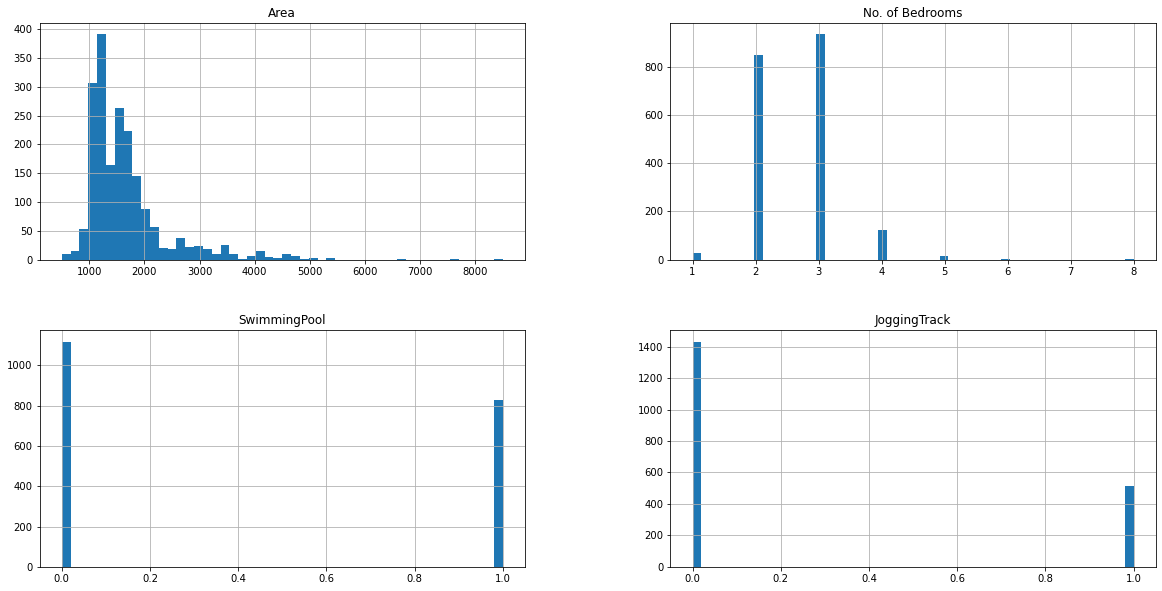

In [14]:
## get distribution of some important columns
cols_to_plot = ['Area', 'No. of Bedrooms', 'SwimmingPool', 'JoggingTrack']
train_set_new[cols_to_plot].hist(bins=50, figsize=(20,10));

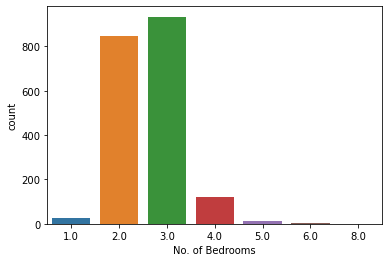

In [15]:
### countplot of 'No. of Bedrooms' column
sns.countplot(x='No. of Bedrooms', data=train_set_new);

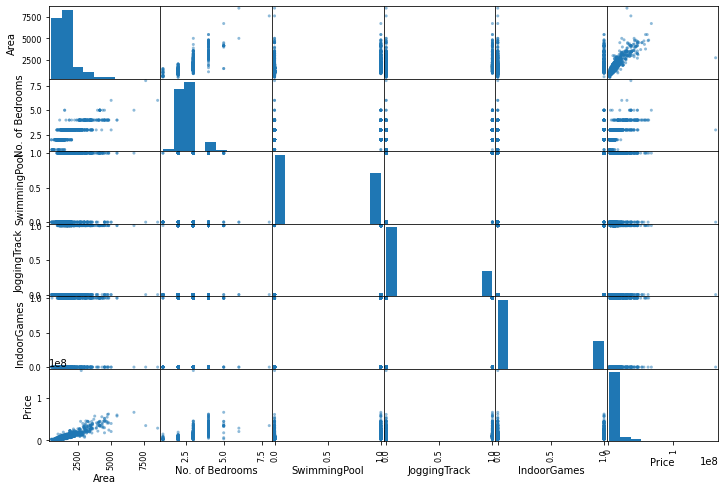

In [16]:
## showing some scatter plots
feats = ['Area', 'No. of Bedrooms', 'SwimmingPool', 'JoggingTrack', 'IndoorGames', 'Price']
pd.plotting.scatter_matrix(train_set_new[feats], figsize=(12, 8));

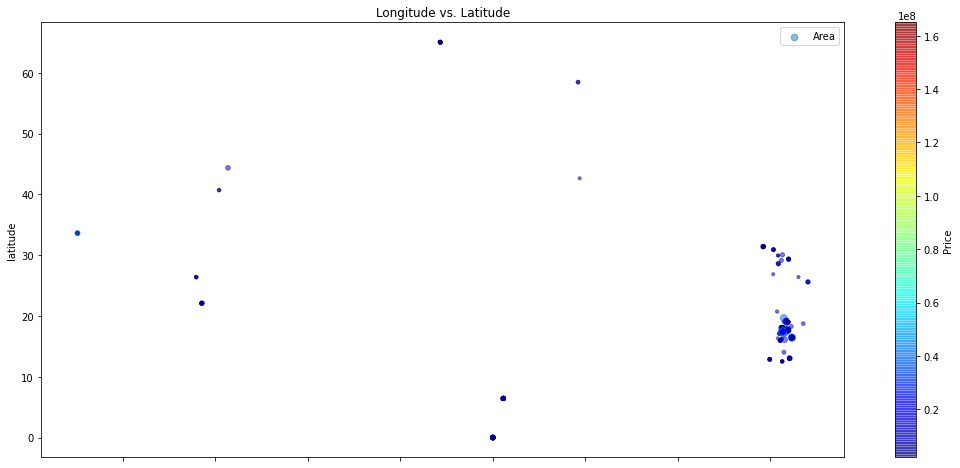

In [17]:
### other visualization using Longitude and Latitude
train_set_new.plot(kind='scatter', x='longitude', y='latitude', 
                  c='Price', cmap=plt.get_cmap('jet'), colorbar=True,
                  figsize=(18, 8), alpha=0.5, s=train_set_new['Area']/100, label='Area')
plt.title('Longitude vs. Latitude')
plt.show()

### Preprocessing

In [18]:
### first of all
## we should change zeros, which i made in longitude and latitude columns 
### where i can not extract their location
### if you remember i make them = 0 , then i decide to impute them using median
### so i should convert zeros to nans to be imputable in the pipeline

train_set_new.loc[train_set_new['latitude']==0, 'latitude'] = np.nan
train_set_new.loc[train_set_new['longitude']==0, 'longitude'] = np.nan

In [19]:
### split the data (train_set) into X, y
X_train_set = train_set_new.drop(columns=['Price'], axis=1)
y_train_set = train_set_new['Price']

X_train_set.shape

(1947, 40)

In [20]:
### read this info carefully , it shows that our code works will unitl this step :D
X_train_set.info()  ### All datatypes are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 1947 non-null   float64
 1   No. of Bedrooms      1947 non-null   float64
 2   Resale               1947 non-null   float64
 3   MaintenanceStaff     1947 non-null   float64
 4   Gymnasium            1947 non-null   float64
 5   SwimmingPool         1947 non-null   float64
 6   LandscapedGardens    1947 non-null   float64
 7   JoggingTrack         1947 non-null   float64
 8   RainWaterHarvesting  1947 non-null   float64
 9   IndoorGames          1947 non-null   float64
 10  ShoppingMall         1947 non-null   float64
 11  Intercom             1947 non-null   float64
 12  SportsFacility       1947 non-null   float64
 13  ATM                  1947 non-null   float64
 14  ClubHouse            1947 non-null   float64
 15  School               1947 non-null   f

#### Data scaling before or after PCA ??? <br /> 
https://datascience.stackexchange.com/questions/36002/data-scaling-before-or-after-pca

In [21]:
### Using Pipeline for (Imputing, Standardization and Dimensionality Reduction)
num_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler()),
                        ('pca', PCA(n_components=6))
                       ])

X_train_final = num_pipeline.fit_transform(X_train_set)
X_train_final = pd.DataFrame(X_train_final)
X_train_final

,0,1,2,3,4,5
0,-2.582348,-0.248451,-0.085237,-0.003619,0.343576,-0.708636
1,-3.133064,1.226686,0.467474,1.974145,1.423703,0.599612
2,5.196270,-1.568432,-0.879630,2.060023,1.077035,0.559577
3,1.207805,0.333836,2.970851,1.559491,-1.262823,-3.188237
4,-2.041537,1.239391,-0.036992,1.799764,0.594163,-1.692833
...,...,...,...,...,...,...
1942,5.319243,-1.261899,0.482365,0.327338,0.191149,-0.327890
1943,-0.572165,-0.433336,-0.454635,1.567334,0.120413,-1.145584
1944,1.782598,-0.788710,-1.925998,-0.045227,-0.029060,-0.770290
1945,-3.380079,-0.294716,0.763418,0.472696,0.200860,1.805267


#### show correlation

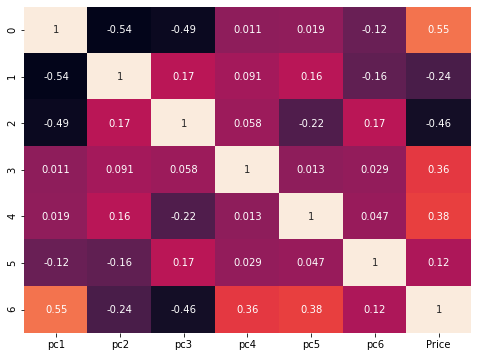

In [22]:
### get correlation coefficeint but using (spearmanr) to handle non linearity of correlation
coef_corr, p_value = spearmanr(X_train_final, train_set['Price'])


### for correlation coeffiecnt
coef_corr = pd.DataFrame(coef_corr, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'Price'])

## Heat Map of correlation
plt.figure(figsize=(8, 6))
sns.heatmap(coef_corr, annot=True, cbar=False);

In [23]:
### for p_values

### 
df_p_value = pd.DataFrame(p_value, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'Price'])
df_p_value < 0.05  
## confidence of 95% , then it means that correlation is happened if p_value less than 0.05
## true fields in the below df means that there is a correlation

,pc1,pc2,pc3,pc4,pc5,pc6,Price
0,True,True,True,False,False,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,False,True,True,True,False,False,True
4,False,True,True,False,True,True,True
5,True,True,True,False,True,True,True
6,True,True,True,True,True,True,True


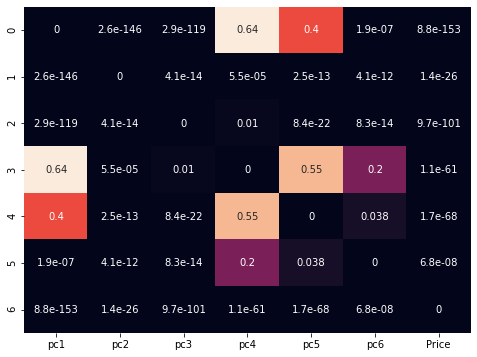

In [24]:
## Heat Map of p_values
## if i choose confidence of 95% then i want p_values to be less than 0.05
## if it is true >> yes it is correlated
## more less p_values >> more likely to be correlated
plt.figure(figsize=(8, 6))

## all black zones are good beacuase P_values are small and almost zeros
## ofcourse the diagonal will be zeros
sns.heatmap(df_p_value, annot=True, cbar=False);

### Model Training

#### ` Choosing a meric of (mean_squared_log_error)`

#### ` try simple LinearRegression `

In [25]:
### it is very simple i will not use it in Voting 
def linear_reg():
    ### try simple LinearRegression

    lin_reg = LinearRegression(positive=True)
    lin_reg.fit(X_train_final, y_train_set)

    ### using cross_validation for scores
    y_scores_lin_reg = cross_val_score(lin_reg, X_train_final, y_train_set, cv=6,
                                       scoring='neg_mean_squared_log_error', n_jobs=-1)

    ### using cross_validation for predict
    y_predict_lin_reg = cross_val_predict(lin_reg, X_train_final, y_train_set, cv=6,
                                          method='predict', n_jobs=-1)

    y_scores_lin_reg = (np.sqrt(-y_scores_lin_reg))
    print('y_scores_lin_reg => \n', y_scores_lin_reg)
    print('==='*10)
    print('mean =>', y_scores_lin_reg.mean())
    print('==='*10)
    print('std =>', y_scores_lin_reg.std())
    print('==='*10)
    rmse_lin_reg = np.sqrt(mean_squared_log_error(y_train_set, y_predict_lin_reg))
    print('rmse_lin_reg =>', rmse_lin_reg)

#### ` try Kneighbours`

In [26]:
## try Kneighbours
knn_reg = KNeighborsRegressor(n_neighbors=10, p=2)

### Using GridSearch for ideal n_neighbors
parms_best = {'n_neighbors': np.arange(1, 20), 'p':[1,2]}
grid_knn = GridSearchCV(knn_reg, param_grid=parms_best, cv=6,
                        scoring='neg_mean_squared_log_error', n_jobs=-1)

grid_knn.fit(X_train_final, y_train_set)

## best model
knn_reg_best = grid_knn.best_estimator_

print('knn_reg_best =>', knn_reg_best)
print('=='*20)


### using cross_validation for scores
y_scores_knn_reg = cross_val_score(knn_reg_best, X_train_final, y_train_set, cv=6,
                                   scoring='neg_mean_squared_log_error', n_jobs=-1)

### using cross_validation for predict
y_predict_knn_reg = cross_val_predict(knn_reg_best, X_train_final, y_train_set, cv=6,
                                      method='predict', n_jobs=-1)


y_scores_knn_reg = (np.sqrt(-y_scores_knn_reg))
print('y_scores_knn_reg => \n', y_scores_knn_reg)
print('==='*10)
print('mean =>', y_scores_knn_reg.mean())
print('==='*10)
print('std =>', y_scores_knn_reg.std())
print('==='*10)
rmsle_knn_reg = np.sqrt(mean_squared_log_error(y_train_set, y_predict_knn_reg))
print('rmsle_knn_reg =>', rmsle_knn_reg)

knn_reg_best => KNeighborsRegressor(n_neighbors=4)
y_scores_knn_reg => 
 [0.29030595 0.30871517 0.31993606 0.31957001 0.29259243 0.31072639]
mean => 0.3069743367645809
std => 0.01175046083288198
rmsle_knn_reg => 0.3071981684078304


#### `try RandomForest`

In [27]:
## try RandomForest
forest_reg = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1)

### Using GridSearch 
parms_best = {'n_estimators': np.arange(80, 300, 50), 
              'max_depth': np.arange(10,30,2)}

grid_forest = GridSearchCV(forest_reg, param_grid=parms_best, cv=6,
                          scoring='neg_mean_squared_log_error', n_jobs=-1)

grid_forest.fit(X_train_final, y_train_set)

## best model
forest_reg_best = grid_forest.best_estimator_

print('forest_reg_best =>', forest_reg_best)
print('=='*20)


### using cross_validation for scores
y_scores_forest_reg = cross_val_score(forest_reg_best, X_train_final, y_train_set, cv=6,
                                     scoring='neg_mean_squared_log_error', n_jobs=-1)

### using cross_validation for predict
y_predict_forest_reg = cross_val_predict(forest_reg_best, X_train_final, y_train_set, cv=6,
                                         method='predict', n_jobs=-1)


y_scores_forest_reg = (np.sqrt(-y_scores_forest_reg))
print('y_scores_forest_reg => \n', y_scores_forest_reg)
print('==='*10)
print('mean =>', y_scores_forest_reg.mean())
print('==='*10)
print('std =>', y_scores_forest_reg.std())
print('==='*10)
rmsle_forest_reg = np.sqrt(mean_squared_log_error(y_train_set, y_predict_forest_reg))
print('rmsle_forest_reg =>', rmsle_forest_reg)

forest_reg_best => RandomForestRegressor(max_depth=26, n_estimators=230, n_jobs=-1)
y_scores_forest_reg => 
 [0.27107022 0.30612687 0.28039826 0.29555872 0.2655025  0.26464839]
mean => 0.28055082767836165
std => 0.015538208942656803
rmsle_forest_reg => 0.2810933338081091


#### `try GRADIENTBOOST`

In [28]:
## try GRADIENTBOOST
gbrt_reg = GradientBoostingRegressor(n_estimators=100, max_depth=2, learning_rate=1)

### Using GridSearch
parms_best = {'n_estimators': np.arange(50, 300, 50), 
              'max_depth': np.arange(1,10,2),
              'learning_rate' : np.arange(0.01,0.3,0.2)}

grid_gbrt = GridSearchCV(gbrt_reg, param_grid=parms_best, cv=6,
                         scoring='neg_mean_squared_log_error', n_jobs=-1)

grid_gbrt.fit(X_train_final, y_train_set)

## best model
gbrt_reg_best = grid_gbrt.best_estimator_

print('gbrt_reg_best =>', gbrt_reg_best)
print('=='*20)


### using cross_validation for scores
y_scores_gbrt_reg = cross_val_score(gbrt_reg_best, X_train_final, y_train_set, cv=6,
                                     scoring='neg_mean_squared_log_error', n_jobs=-1)

### using cross_validation for predict
y_predict_gbrt_reg = cross_val_predict(gbrt_reg_best, X_train_final, y_train_set, cv=6,
                                         method='predict', n_jobs=-1)


y_scores_gbrt_reg = (np.sqrt(-y_scores_gbrt_reg))
print('y_scores_gbrt_reg => \n', y_scores_gbrt_reg)
print('==='*10)
print('mean =>', y_scores_gbrt_reg.mean())
print('==='*10)
print('std =>', y_scores_gbrt_reg.std())
print('==='*10)
rmsle_gbrt_reg = np.sqrt(mean_squared_log_error(y_train_set, y_predict_gbrt_reg))
print('rmsle_gbrt_reg =>', rmsle_gbrt_reg)

C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.35462422 -0.31393315 -0.27972936 -0.25362744 -0.2345544  -0.27874505
 -0.21510678 -0.17953738 -0.15810304 -0.14362356 -0.2507354  -0.17540106
 -0.13887705 -0.11885582 -0.1071319  -0.23523028 -0.1570808  -0.12127583
 -0.10327281 -0.09459214 -0.23097374 -0.14960421 -0.11329069 -0.09722267
 -0.08930044 -0.13928944 -0.13893987         nan         nan         nan
 -0.1034391          nan         nan -0.09539021 -0.09764751 -0.08851384
 -0.08459691 -0.08387406 -0.08293601 -0.08465107 -0.08262784 -0.08329297
 -0.08271047 -0.08236032 -0.08373536 -0.08668535 -0.08616426 -0.08762899
 -0.0870978  -0.08699247]
  warnings.warn(


gbrt_reg_best => GradientBoostingRegressor(learning_rate=0.21000000000000002, max_depth=7,
                          n_estimators=200)
y_scores_gbrt_reg => 
 [0.28648642 0.3074071  0.28532145 0.28887555 0.27872497 0.2739691 ]
mean => 0.28679743352313164
std => 0.010496689437188582
rmsle_gbrt_reg => 0.2898995786941413


#### `VotingRegression`

In [29]:
## using  voting
voting_reg = VotingRegressor(estimators=[
                                ('knn', knn_reg_best),
                                ('forest', forest_reg_best),
                                ('gbrt', gbrt_reg_best)], 
                             n_jobs=-1)

voting_reg.fit(X_train_final, y_train_set)

### using cross_validation for scores
y_scores_voting_reg = cross_val_score(voting_reg, X_train_final, y_train_set, cv=6,
                                      scoring='neg_mean_squared_log_error', n_jobs=-1)

### using cross_validation for predict
y_predict_voting_reg = cross_val_predict(voting_reg, X_train_final, y_train_set, cv=6,
                                         method='predict', n_jobs=-1)

y_scores_voting_reg = (np.sqrt(-y_scores_voting_reg))
print('y_scores_voting_reg => \n', y_scores_voting_reg)
print('==='*10)
print('mean =>', y_scores_voting_reg.mean())
print('==='*10)
print('std =>', y_scores_voting_reg.std())
print('==='*10)
rmsle_voting_reg = np.sqrt(mean_squared_log_error(y_train_set, y_predict_voting_reg))
print('rmsle_voting_reg =>', rmsle_voting_reg) ## from the results it acts well

y_scores_voting_reg => 
 [0.26540046 0.29394741 0.27743069 0.28453135 0.26060722 0.2662764 ]
mean => 0.27469892079564123
std => 0.011765909669775006
rmsle_voting_reg => 0.27599104587387685


### Saving this Model to mycomputer

In [30]:
### save this model(final one)
joblib.dump(voting_reg, 'final_model.pkl')

['final_model.pkl']

In [31]:
### load this model >> feel free to use it now and evaluate on the test set
final_model = joblib.load('final_model.pkl')
final_model

VotingRegressor(estimators=[('knn', KNeighborsRegressor(n_neighbors=4)),
                            ('forest',
                             RandomForestRegressor(max_depth=26,
                                                   n_estimators=230,
                                                   n_jobs=-1)),
                            ('gbrt',
                             GradientBoostingRegressor(learning_rate=0.21000000000000002,
                                                       max_depth=7,
                                                       n_estimators=200))],
                n_jobs=-1)

****************************
***************

### Evaluation on test set

In [32]:
### look at the big picture
test_set.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
1800,16299999,2630,Kokapet,4,0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141,8510000,1702,Manikonda,3,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1928,5500000,1665,Madinaguda,3,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1810,35200000,4146,Gachibowli,5,0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,40000000,3600,Jubilee Hills,4,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Preporcessing the test set as i did before on train

In [33]:
latitude_test = []
longitude_test = []

### the same thing i did above with the same note (please read them carefully)

def dummy_func_test():
    for i in range(len(test_set)):
        print(i)
        geolocator = Nominatim(user_agent='myapplication')
        total_data = geolocator.geocode(test_set['Location'].values[i])
        if total_data:
            latitude_test.append(total_data.latitude)
            longitude_test.append(total_data.longitude)
        else:
            latitude_test.append(0)
            longitude_test.append(0)
            
    df_latitude = pd.DataFrame({'latitude':latitude_test})
    df_longitude = pd.DataFrame({'longitude':longitude_test})
    df_latitude.to_csv('latitude_test.csv')
    df_longitude.to_csv('longitude_test.csv')
    
    print('Done perfectly :D')

### i call this functio for one time only , you do not need to call it again, it is just one time
#dummy_func_test()

In [34]:
## Read them again by pandas to be able to work on them and not run the main code
df_latitude_test = pd.read_csv('latitude_test.csv')
df_longitude_test = pd.read_csv('longitude_test.csv')

## conctentate both of them
df_long_lat_test = pd.concat([df_latitude_test, df_longitude_test], axis=1)
df_long_lat_test.drop(columns=['Unnamed: 0'], axis=1, inplace=True)


### by checking , some cities can not be extracted so in the main code i make them = 0
## i will impute them using the median not dropping them
## in the pipeling 
df_long_lat_test[(df_long_lat_test['latitude']==0) | (df_long_lat_test['longitude']==0)]

,latitude,longitude
7,0.0,0.0
11,0.0,0.0
51,0.0,0.0
56,0.0,0.0
59,0.0,0.0
90,0.0,0.0
115,0.0,0.0
123,0.0,0.0
131,0.0,0.0
133,0.0,0.0


In [35]:
### extract column names
column_names = list(test_set.columns) + list(df_long_lat_test.columns)

### concatenate both 
test_set_new = np.concatenate([test_set, df_long_lat_test], axis=1)
test_set_new = pd.DataFrame(test_set_new, columns=column_names)

## drop column of Location, we do not need it again
test_set_new = test_set_new.drop(columns=['Location'], axis=1)

### after taht i found that i want to change types of data it was object
test_set_new = test_set_new.apply(lambda x: np.float64(x))
test_set_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                487 non-null    float64
 1   Area                 487 non-null    float64
 2   No. of Bedrooms      487 non-null    float64
 3   Resale               487 non-null    float64
 4   MaintenanceStaff     487 non-null    float64
 5   Gymnasium            487 non-null    float64
 6   SwimmingPool         487 non-null    float64
 7   LandscapedGardens    487 non-null    float64
 8   JoggingTrack         487 non-null    float64
 9   RainWaterHarvesting  487 non-null    float64
 10  IndoorGames          487 non-null    float64
 11  ShoppingMall         487 non-null    float64
 12  Intercom             487 non-null    float64
 13  SportsFacility       487 non-null    float64
 14  ATM                  487 non-null    float64
 15  ClubHouse            487 non-null    flo

In [36]:
### first of all
## we should change zeros, which i made in longitude and latitude columns 
### where i can not extract their location
### if you remember i make them = 0 , then i decide to impute them using median
### so i should convert zeros to nans to be imputable in the pipeline

test_set_new.loc[test_set_new['latitude']==0, 'latitude'] = np.nan
test_set_new.loc[test_set_new['longitude']==0, 'longitude'] = np.nan

In [37]:
### split the data (train_set) into X, y
X_test_set = test_set_new.drop(columns=['Price'], axis=1)
y_test_set = test_set_new['Price']

X_test_set.shape

(487, 40)

In [38]:
### read this info carefully , it shows that our code works will unitl this step :D
X_test_set.info()  ### All datatypes are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 487 non-null    float64
 1   No. of Bedrooms      487 non-null    float64
 2   Resale               487 non-null    float64
 3   MaintenanceStaff     487 non-null    float64
 4   Gymnasium            487 non-null    float64
 5   SwimmingPool         487 non-null    float64
 6   LandscapedGardens    487 non-null    float64
 7   JoggingTrack         487 non-null    float64
 8   RainWaterHarvesting  487 non-null    float64
 9   IndoorGames          487 non-null    float64
 10  ShoppingMall         487 non-null    float64
 11  Intercom             487 non-null    float64
 12  SportsFacility       487 non-null    float64
 13  ATM                  487 non-null    float64
 14  ClubHouse            487 non-null    float64
 15  School               487 non-null    flo

In [39]:
### Using Pipeline for (Imputing, Standardization and Dimensionality Reduction)

### Note Here i transform not fit_transform
X_test_final = num_pipeline.transform(X_test_set)
X_test_final = pd.DataFrame(X_test_final)
X_test_final

,0,1,2,3,4,5
0,5.096582,-1.495006,-1.064300,2.326699,0.824466,0.584576
1,-1.270612,-0.767308,-0.237024,0.253296,0.304120,1.656901
2,-3.296851,-0.296341,0.553656,0.536964,0.583225,1.001132
3,6.392137,-1.525748,-1.454500,2.888958,2.241832,2.282267
4,-2.887906,0.116499,0.037145,2.685410,2.844902,1.398483
...,...,...,...,...,...,...
482,-3.523752,-0.346367,0.879830,-0.261482,-0.479396,0.638937
483,2.708117,-1.043782,-1.762197,0.389191,-0.635691,-0.921600
484,-3.532293,-0.348469,0.888162,-0.294133,-0.512262,0.635017
485,0.223424,-0.560315,-2.010886,-2.092588,1.352925,-0.315790


In [40]:
X_test_final.info()  ### ok here all is ok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       487 non-null    float64
 1   1       487 non-null    float64
 2   2       487 non-null    float64
 3   3       487 non-null    float64
 4   4       487 non-null    float64
 5   5       487 non-null    float64
dtypes: float64(6)
memory usage: 23.0 KB


### <a> Final Prediction <a />

In [41]:
y_predict_test = final_model.predict(X_test_final)

y_predict_test = pd.DataFrame({'results': y_predict_test})

### get the root mean square log error
rmsle_test = np.sqrt(mean_squared_log_error(y_test_set, y_predict_test))
print('rmsle_test =>', rmsle_test)

rmsle_test => 0.22741893273676478


In [42]:
#### i think it is acceptable error in Regression Problems :D
#### the result when using cross validation on train is 0.27 , so model acts will as i think

### Done